<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">



# _*Exercises*_

The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

This notebook is aimed to help you understand the content of notebooks in this folder by working on the problems listed.

You'll need to run the cells to use this tutorial. To run a cell, do the following.

* For laptops and desktops, click on the cell and press **Shift-Enter**.

* For mobile devices, tap on the icon that appears to the left of a cell.

Get started by doing this for the cell below (it will take a second or two to run).

In [1]:
#importing array and useful math functions
import numpy as np

#importing circuits and registers
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

#importing backends and running environment
from qiskit import BasicAer, execute


## Problem 1: Playing with Circuits

Q: Prepare two quantum registers each of which has size 2 qubits, and a quantum register consisting of 4 bits.

In [2]:
qr1 = QuantumRegister(2)
qr2 = QuantumRegister(2)
cr  = ClassicalRegister(4)

Q: Create a circuit using the above registers.

In [3]:
qc  = QuantumCircuit(qr1, qr2, cr)

Q: Apply NOT gate and the Hadamard gate to the the first qubit of the first register. Then, apply the controlled NOT with the first qubit as control on the first register.

In [4]:
qc.x(qr1[0])
qc.h(qr1[0])
qc.cx(qr1[0], qr1[1])

Apply the Hadamard gate to the second qubit of the second register. Then, apply the controlled NOT with the second qubit as control on the second register.

In [5]:
qc.h(qr2[1])
qc.cx(qr2[1], qr2[0])

Q: Draw the circuit.

In [6]:
qc.draw()

Q: Create another circuit consisting of the same register as the first circuit. Apply the controlled NOT gate with the second qubit of the first register as control and the first qubit of the second register as target to the circuit. And, draw the circuit. 

In [7]:
other_qc = QuantumCircuit(qr1, qr2, cr)
other_qc.cx(qr1[1], qr2[0])
other_qc.draw()

Q: What are the numbers of tensor factors of the first and second circuits? 

In [8]:
print(qc.num_tensor_factors(), other_qc.num_tensor_factors())

6 7


Q: Create another circuit by appending the second circuit to the first circuit.

In [9]:
new_qc = qc + other_qc
new_qc.draw()

Q: Create a measurement circuit that store the result of measuring quantum registers to the classical register.

In [10]:
measure_qc = QuantumCircuit(qr1, qr2, cr)
measure_qc.measure(qr1[0], cr[0])
measure_qc.measure(qr1[1], cr[1])
measure_qc.measure(qr2[0], cr[2])
measure_qc.measure(qr2[1], cr[3])
measure_qc.draw()

Q: Add the measurement circuit to the combined quantum circuit by first applying barrier. 

In [11]:
new_qc.barrier(qr1, qr2)
new_qc += measure_qc
new_qc.draw()

Q: What is the number of tensor factor of the final circuit? 

In [12]:
new_qc.num_tensor_factors()

1

Q: Run the circuit on the local simulator backend.

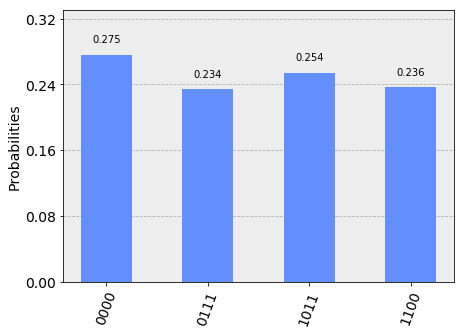

In [17]:
backend = BasicAer.get_backend('qasm_simulator') # run on local simulator by default
job = execute([new_qc], backend)
result = job.result()

# import basic plot tools
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(new_qc))

## Problem 2: Circuit Equivalence

Q: Create a quantum circuit that consists of a two-qubit quantum register and a two-bit classical register. 

In [13]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

### Swap gate

Q: Add three controlled NOT gates to the circuit as follows: apply the controlled NOT with the first qubit as control, and then the controlled NOT with the second qubit as control, and the controlled NOT with the first qubit as control. 

In [14]:
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[0])
qc.cx(qr[0], qr[1])
qc.draw()

Q: Show that the above circuit swaps the first qubit to the second qubit. 
(*HINT: Straightforwardly by checking all possible classical inputs (bases) and seeing the outputs*)

Q: Create another circuit that consists of three controlled NOT gates on the same registers as the first circuit as follows: apply the controlled NOT with the second qubit as control, and then the controlled NOT with the first qubit as control, and the controlled NOT with the second qubit as control. 

In [18]:
qc2 = QuantumCircuit(qr, cr)
qc2.cx(qr[1], qr[0])
qc2.cx(qr[0], qr[1])
qc2.cx(qr[1], qr[0])
qc2.draw()

Q: Show that the above circuit is equal to the first swap circuit. (*HINT: append the second circuit to the first circuit and run the resulting circuit on all possible input bits*)

## Problem 3: Equivalence up to the Global Phase

Q: Create a quantum circuit which consist of a two-qubit quantum register and a two-bit classical register. 

In [20]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

Q: Using the above circuit, show that the X (or, NOT) gate is equal to the $u3$ gate with parameters $(\pi, 0, \pi)$. Those gates are equivalence up to the global phase. 

Q: Using the above circuit, show that the controlled NOT gate is not equal to the controlled-$u3(\pi,0,\pi)$ gate. Notice that eventhough two single-qubit gates are equivalent up to the global phase, their controlled gates can be different. 

# Contributing

We welcome feedback and new problems to be added to this notebook.